#First Encoder 
Build a simple autoencoder that will take in 3D data and encode into 2D and then decode it back to 3D

##Imports 

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


##Prepare and preview the dataset

Create synthetic data to act as input to the autoencoder

In [2]:
def generate_data(m):
  """
  plots m random points on a 3D plane
  """

  angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
  data = np.empty((m, 3))
  data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.rand(m)/2
  data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.rand(m) / 2
  data[:,2] = data[:,0] * 0.1 + data[:,1] * 0.3 + 0.1 * np.random.rand(m)

  return data

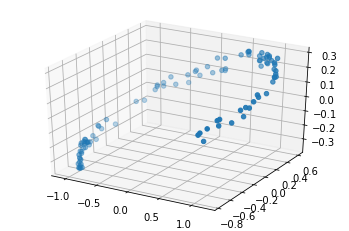

In [6]:
#Use the function above 
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

#Preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap="Reds")


##Build the Model 

In [7]:
encoder = keras.models.Sequential([
        keras.layers.Dense(2, input_shape=[3])
])

decoder = keras.models.Sequential([
        keras.layers.Dense(3, input_shape=[2])
])

autoencoder = keras.models.Sequential([encoder, decoder])

##Compile the Model 



In [11]:
autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

##Train the model 

In [12]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9700
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9700
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9700
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9600
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9800
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9800
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9700
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9800
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9800
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9800
Epoch 11/200
4/4 [===========

##Plot the encoder output

In [13]:
#Encode the data 
codings = encoder.predict(X_train)

#See a sampel input-encoder output pair 
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [0.90137565 0.5197268  0.26680734]
encoded point: [-0.62146735 -0.91124433]


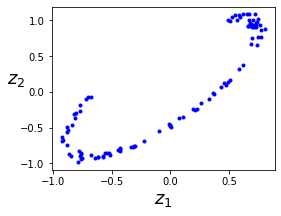

In [20]:
#Plot all encoder outputs 
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:, 0], codings[:, 1], 'b.')
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.grid=True
plt.show()

##Plot the decoder output

The decoder attempts to reconstruct the original input but it won't be perfect since there is data loss during the encoding process

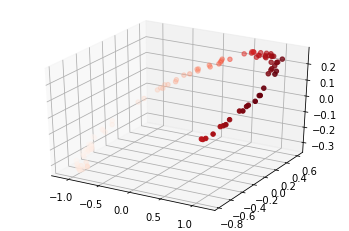

In [24]:
#Decode the encoder 
decodings  = decoder.predict(codings)

#Plot the decoder output 
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds')